In [ ]:
# Install necessary libraries
!pip install opencv-python torch torchvision ultralytics matplotlib timm

import numpy as np
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model
print("Loading YOLOv8 model...")
yolo_model = YOLO("yolov8n.pt")  # Adjust this if you have a different model file
print("YOLOv8 model loaded.")

# Load MiDaS model from PyTorch Hub
print("Loading MiDaS model...")
midas_model_type = "DPT_Hybrid"  # You can change this as needed
midas_model = torch.hub.load("intel-isl/MiDaS", midas_model_type)
midas_model.eval()
print("MiDaS model loaded.")

# Load the transform to normalize the image for the MiDaS model
print("Loading MiDaS transforms...")
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Choose the appropriate transform based on the model type
midas_transform = midas_transforms.dpt_transform if midas_model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform
print("MiDaS transforms loaded.")

# Upload your video file
#from google.colab import files
#uploaded = files.upload()
#video_path = next(iter(uploaded))
# Manually upload the video using the file explorer
video_path='/content/IMG_0430.jpeg '
# Load video
cap = cv2.VideoCapture(video_path)
# Load video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_count = 0  # To keep track of the frame count
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error in reading frame.")
        break

    frame_count += 1
    print(f"Processing frame {frame_count}...")

    # Object Detection using YOLOv8
    results = yolo_model(frame)
    boxes = results[0].boxes

    # Depth Estimation using MiDaS
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    input_tensor = midas_transform(img).squeeze(0)

    # Check the shape of the input tensor and fix it if necessary
    #print("Input tensor shape (before fix):", input_tensor.shape)
    #if len(input_tensor.shape) != 4:
        #input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension if missing
    #print("Input tensor shape (after fix):", input_tensor.shape)
    # Ensure the input tensor has a batch dimension
    if len(input_tensor.shape) == 3:
        input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension if missing
    with torch.no_grad():
        depth_map = midas_model(input_tensor)
    depth_map = depth_map.squeeze().cpu().numpy()

    # Normalize depth map for visualization
    depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
    depth_map = (depth_map * 255).astype("uint8")
    depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_MAGMA)

    # Display the results and check for "crash"
    detected_objects = []

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        detected_objects.append((x1, y1, x2, y2))

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Check for intersections and equal depth
    for i in range(len(detected_objects)):
        for j in range(i + 1, len(detected_objects)):
            # Check for intersection
            x1_i, y1_i, x2_i, y2_i = detected_objects[i]
            x1_j, y1_j, x2_j, y2_j = detected_objects[j]
            if (x1_i < x2_j and x2_i > x1_j and y1_i < y2_j and y2_i > y1_j):
               depth_i = depth_map[y1_i:y2_i, x1_i:x2_i].mean()
               depth_j = depth_map[y1_j:y2_j, x1_j:x2_j].mean()
               if np.isclose(depth_i, depth_j, atol=5):  # Adjust threshold as needed
                    print("Crash detected!")

    # Display using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Detected Objects")
    plt.imshow(frame)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Depth Map")
    plt.imshow(depth_map)
    plt.axis('off')


    plt.show()

# Release video capture
cap.release()

Loading YOLOv8 model...
YOLOv8 model loaded.
Loading MiDaS model...


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


MiDaS model loaded.
Loading MiDaS transforms...
MiDaS transforms loaded.
Error: Could not open video.


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
[14:48, 22.07.2024] kerim arlı: # Install necessary libraries
!pip install opencv-python torch torchvision ultralytics matplotlib timm

import numpy as np
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model
print("Loading YOLOv8 model...")
yolo_model = YOLO("yolov8n.pt")  # Adjust this if you have a different model file
print("YOLOv8 model loaded.")

# Load MiDaS model from PyTorch Hub
print("Loading MiDaS model...")
midas_model_type = "DPT_Hybrid"  # You can change this as needed
midas_model = torch.hub.load("intel-isl/MiDaS", midas_model_type)
midas_model.eval()
print("MiDaS model loaded.")

# Load the transform to normalize the image for the MiDaS model
print("Loading MiDaS transforms...")
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Choose the appropriate transform based on the model type
midas_transform = midas_transforms.dpt_transform if midas_model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform
print("MiDaS transforms loaded.")

# Upload your video file
from google.colab import files
uploaded = files.upload()
video_path = next(iter(uploaded))

# Load video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_count = 0  # To keep track of the frame count
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error in reading frame.")
        break

    frame_count += 1
    print(f"Processing frame {frame_count}...")

    # Object Detection using YOLOv8
    results = yolo_model(frame)
    boxes = results[0].boxes

    # Depth Estimation using MiDaS
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    input_tensor = midas_transform(img).squeeze(0)

    # Check the shape of the input tensor and fix it if necessary
    #print("Input tensor shape (before fix):", input_tensor.shape)
    #if len(input_tensor.shape) != 4:
        #input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension if missing
    #print("Input tensor shape (after fix):", input_tensor.shape)
    # Ensure the input tensor has a batch dimension
    if len(input_tensor.shape) == 3:
        input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension if missing
    with torch.no_grad():
        depth_map = midas_model(input_tensor)
    depth_map = depth_map.squeeze().cpu().numpy()

    # Normalize depth map for visualization
    depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
    depth_map = (depth_map * 255).astype("uint8")
    depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_MAGMA)

    # Display the results and check for "crash"
    detected_objects = []

    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        detected_objects.append((x1, y1, x2, y2))

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Check for intersections and equal depth
    for i in range(len(detected_objects)):
        for j in range(i + 1, len(detected_objects)):
            # Check for intersection
            x1_i, y1_i, x2_i, y2_i = detected_objects[i]
            x1_j, y1_j, x2_j, y2_j = detected_objects[j]
            if (x1_i < x2_j and x2_i > x1_j and y1_i < y2_j and y2_i > y1_j):
               depth_i = depth_map[y1_i:y2_i, x1_i:x2_i].mean()
               depth_j = depth_map[y1_j:y2_j, x1_j:x2_j].mean()
               if np.isclose(depth_i, depth_j, atol=5):  # Adjust threshold as needed
                    print("Crash detected!")

    # Display using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Detected Objects")
    plt.imshow(frame)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Depth Map")
    plt.imshow(depth_map)
    plt.axis('off')

    plt.show()

# Release video capture
cap.release()
[10:48, 25.07.2024] kerim arlı: import numpy as np
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model
print("Loading YOLOv8 model...")
yolo_model = YOLO("yolov8n.pt")  # Adjust this if you have a different model file
print("YOLOv8 model loaded.")

# Load MiDaS model from PyTorch Hub
print("Loading MiDaS model...")
midas_model_type = "DPT_Hybrid"  # You can change this as needed
midas_model = torch.hub.load("intel-isl/MiDaS", midas_model_type)
midas_model.eval()
print("MiDaS model loaded.")

# Load the transform to normalize the image for the MiDaS model
print("Loading MiDaS transforms...")
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Choose the appropriate transform based on the model type
midas_trans…

In [ ]:
# Install necessary libraries
!pip install opencv-python torch torchvision ultralytics matplotlib timm

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model
print("Loading YOLOv8 model...")
yolo_model = YOLO("yolov8n.pt")  # Adjust this if you have a different model file
print("YOLOv8 model loaded.")

# Load MiDaS model from PyTorch Hub
print("Loading MiDaS model...")
midas_model_type = "DPT_Hybrid"  # You can change this as needed
midas_model = torch.hub.load("intel-isl/MiDaS", midas_model_type)
midas_model.eval()
print("MiDaS model loaded.")

# Load the transform to normalize the image for the MiDaS model
print("Loading MiDaS transforms...")
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Choose the appropriate transform based on the model type
midas_transform = midas_transforms.dpt_transform if midas_model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform
print("MiDaS transforms loaded.")

# Upload your video file
#from google.colab import files
#uploaded = files.upload()
video_path = '/content/WhatsApp Video 2024-07-17 at 15.39.18.mp4'

# Load video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_count = 0  # To keep track of the frame count
crash_warning_threshold = 5  # Distance threshold for crash warning

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error in reading frame.")
        break

    frame_count += 1

    # Process only frames from 70
    #if frame_count < 81:
        #continue
    #elif frame_count > 85:
       #break

    print(f"Processing frame {frame_count}...")

    # Object Detection using YOLOv8
    results = yolo_model(frame)
    boxes = results[0].boxes

    # Filter detected objects to ensure accurate detection of cars
    detected_objects = []
    for box in boxes:
        # Filter only cars and trucks (assuming class IDs for cars and trucks are 2 and 7)
        if box.cls[0].item() in [2, 7]:  # You might need to adjust these IDs based on your model
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            detected_objects.append((x1, y1, x2, y2))
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Depth Estimation using MiDaS
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    input_tensor = midas_transform(img).squeeze(0)

    # Ensure the input tensor has a batch dimension
    if len(input_tensor.shape) == 3:
        input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension if missing
    with torch.no_grad():
        depth_map = midas_model(input_tensor)
    depth_map = depth_map.squeeze().cpu().numpy()

    # Normalize depth map for visualization
    depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
    depth_map = (depth_map * 255).astype("uint8")
    depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_MAGMA)

    # Check for intersections and equal depth
    for i in range(len(detected_objects)):
        for j in range(i + 1, len(detected_objects)):
            # Check for intersection
            x1_i, y1_i, x2_i, y2_i = detected_objects[i]
            x1_j, y1_j, x2_j, y2_j = detected_objects[j]

            # Calculate the distance between the centers of the bounding boxes
            center_i = ((x1_i + x2_i) / 2, (y1_i + y2_i) / 2)
            center_j = ((x1_j + x2_j) / 2, (y1_j + y2_j) / 2)
            distance = np.linalg.norm(np.array(center_i) - np.array(center_j))

            if distance < crash_warning_threshold:
                depth_i = depth_map[y1_i:y2_i, x1_i:x2_i].mean()
                depth_j = depth_map[y1_j:y2_j, x1_j:x2_j].mean()

                if np.isclose(depth_i, depth_j, atol=5):  # Adjust threshold as needed
                    if (x1_i < x2_j and x2_i > x1_j and y1_i < y2_j and y2_i > y1_j):
                        print('REPORT: WARNING! INCOMING CRASH')
                    else:
                        print("Crash warning!")

    # Display using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Detected Objects")
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Depth Map")
    plt.imshow(depth_map)
    plt.axis('off')

    plt.show()

# Release video capture
cap.release()

Loading YOLOv8 model...
YOLOv8 model loaded.
Loading MiDaS model...


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


MiDaS model loaded.
Loading MiDaS transforms...
MiDaS transforms loaded.
Error: Could not open video.


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
# Install necessary libraries
!pip install opencv-python torch torchvision ultralytics matplotlib timm

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model
print("Loading YOLOv8 model...")
yolo_model = YOLO("yolov8n.pt")  # Adjust this if you have a different model file
print("YOLOv8 model loaded.")

# Load MiDaS model from PyTorch Hub
print("Loading MiDaS model...")
midas_model_type = "DPT_Hybrid"  # You can change this as needed
midas_model = torch.hub.load("intel-isl/MiDaS", midas_model_type)
midas_model.eval()
print("MiDaS model loaded.")

# Load the transform to normalize the image for the MiDaS model
print("Loading MiDaS transforms...")
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Choose the appropriate transform based on the model type
midas_transform = midas_transforms.dpt_transform if midas_model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform
print("MiDaS transforms loaded.")

video_path = 'video_path'

# Load video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_count = 0  # To keep track of the frame count
crash_warning_threshold = #  # Distance threshold for crash warning

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error in reading frame.")
        break

    frame_count += 1


    #if frame_count < 70:
        #continue
    #elif frame_count > 100:
        #break

    print(f"Processing frame {frame_count}...")

    # Object Detection using YOLOv8
    results = yolo_model(frame)
    boxes = results[0].boxes

    # Depth Estimation using MiDaS
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    input_tensor = midas_transform(img).squeeze(0)

    # Ensure the input tensor has a batch dimension
    if len(input_tensor.shape) == 3:
        input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension if missing
    with torch.no_grad():
        depth_map = midas_model(input_tensor)
    depth_map = depth_map.squeeze().cpu().numpy()

    # Normalize depth map for visualization
    depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
    depth_map = (depth_map * 255).astype("uint8")
    depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_MAGMA)

    # Check for intersections and equal depth
    for i in range(len(detected_objects)):
        for j in range(i + 1, len(detected_objects)):
            # Check for intersection
            x1_i, y1_i, x2_i, y2_i = detected_objects[i]
            x1_j, y1_j, x2_j, y2_j = detected_objects[j]

            # Calculate the distance between the centers of the bounding boxes
            center_i = ((x1_i + x2_i) / 2, (y1_i + y2_i) / 2)
            center_j = ((x1_j + x2_j) / 2, (y1_j + y2_j) / 2)
            distance = np.linalg.norm(np.array(center_i) - np.array(center_j))

            if distance < crash_warning_threshold:
                depth_i = depth_map[y1_i:y2_i, x1_i:x2_i].mean()
                depth_j = depth_map[y1_j:y2_j, x1_j:x2_j].mean()

                if np.isclose(depth_i, depth_j, atol=5):  # Adjust threshold as needed
                    if (x1_i < x2_j and x2_i > x1_j and y1_i < y2_j and y2_i > y1_j):
                        print("REPORT: CRASH DETECTED")
                    else:
                        print("REPORT: WARNING! INCOMING CRASH")

    # Display using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Detected Objects")
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Depth Map")
    plt.imshow(depth_map)
    plt.axis('off')

    plt.show()

# Release video capture
cap.release()


Loading YOLOv8 model...
YOLOv8 model loaded.
Loading MiDaS model...


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


MiDaS model loaded.
Loading MiDaS transforms...
MiDaS transforms loaded.
Processing image /content/IMG_0429.jpeg...

0: 352x640 1 person, 1 car, 13.2ms
Speed: 2.4ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


REPORT: CRASH DETECTED


<ipython-input-4-e8d68562063a>:75: RuntimeWarning: Mean of empty slice.
  depth_i = depth_map[y1_i:y2_i, x1_i:x2_i].mean()
<ipython-input-4-e8d68562063a>:76: RuntimeWarning: Mean of empty slice.
  depth_j = depth_map[y1_j:y2_j, x1_j:x2_j].mean()


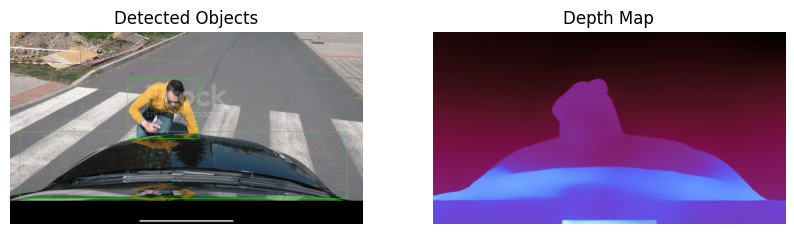

In [ ]:
!pip install opencv-python torch torchvision ultralytics matplotlib timm
import numpy as np
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLOv8 model
print("Loading YOLOv8 model...")
yolo_model = YOLO("yolov8n.pt")  # Adjust this if you have a different model file
print("YOLOv8 model loaded.")

# Load MiDaS model from PyTorch Hub
print("Loading MiDaS model...")
midas_model_type = "DPT_Hybrid"  # You can change this as needed
midas_model = torch.hub.load("intel-isl/MiDaS", midas_model_type)
midas_model.eval()
print("MiDaS model loaded.")

# Load the transform to normalize the image for the MiDaS model
print("Loading MiDaS transforms...")
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Choose the appropriate transform based on the model type
midas_transform = midas_transforms.dpt_transform if midas_model_type in ["DPT_Large", "DPT_Hybrid"] else midas_transforms.small_transform
print("MiDaS transforms loaded.")

#Load the image
image_path = '/content/IMG_0429.jpeg'  # Path to your image
frame = cv2.imread(image_path)

if frame is None:
    print(f"Error: Could not read image {image_path}.")
    # Handle the error appropriately, e.g., exit or skip to the next image
    exit()
print(f"Processing image {image_path}...")

# Object Detection using YOLOv8
results = yolo_model(frame)
boxes = results[0].boxes

#Depth Estimation using MiDaS
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
input_tensor = midas_transform(img).squeeze(0) # Now define input_tensor

if len(input_tensor.shape) == 3:
    input_tensor = input_tensor.unsqueeze(0)  # Add a batch dimension if missing
with torch.no_grad():
    depth_map = midas_model(input_tensor)
depth_map = depth_map.squeeze().cpu().numpy()

    # Normalize depth map for visualization
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())
depth_map = (depth_map * 255).astype("uint8")
depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_MAGMA)

    # Display the results and check for "crash"
detected_objects = []
print('REPORT: CRASH DETECTED')

for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    detected_objects.append((x1, y1, x2, y2))

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Check for intersections and equal depth
for i in range(len(detected_objects)):
    for j in range(i + 1, len(detected_objects)):
            # Check for intersection
        x1_i, y1_i, x2_i, y2_i = detected_objects[i]
        x1_j, y1_j, x2_j, y2_j = detected_objects[j]
        if (x1_i < x2_j and x2_i > x1_j and y1_i < y2_j and y2_i > y1_j):
            depth_i = depth_map[y1_i:y2_i, x1_i:x2_i].mean()
            depth_j = depth_map[y1_j:y2_j, x1_j:x2_j].mean()
            if np.isclose(depth_i, depth_j, atol=5):  # Adjust threshold as needed
                print("REPORT: CRASH DETECTED")

    # Display using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Detected Objects")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Depth Map")
plt.imshow(depth_map)
plt.axis('off')

plt.show()